<a href="https://colab.research.google.com/github/tahahamdii/salary-predicition/blob/main/salaryprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib



# Step 2: Data Exploration and Cleaning
# Display the first few rows of the dataset

In [21]:
data = pd.read_csv('/content/data.csv')

print(data.head())

                            ID_Employee          NAME_EMP GENDER  \
0  002dc89c-4da0-47dd-99c5-0d46d7018ba6  Ricardo Thompson      F   
1  007d5408-fdc5-45d2-9e86-b9dffa069ae0     Chad Martinez      M   
2  00aab275-6c85-4095-90ce-2f9157fe648d       Robert Ross      M   
3  00b85c59-d569-447c-9a0f-734e46c93b79        Lisa Baker      M   
4  00ca3496-ed2e-44a1-860b-d417f2f0b232    Jennifer Jones      F   

                                             ADDRESS  MARITAL_STATUS  \
0          49958 Tyler Trail\nNorth Carlos, GA 14076             1.0   
1      884 Charlotte Stravenue\nPort Diana, NM 15125             0.0   
2         38607 Alvin Haven\nPort Brittany, MD 83087             0.0   
3        44888 Cooper Summit\nPort Kristin, WV 26390             1.0   
4  40612 Tucker Creek Suite 608\nNew Justinport, ...             0.0   

  TYPE_DIPLOMA  EXP_YEARS                         EMAIL  \
0      Licence       20.0  ricardo_thompson@example.com   
1      Licence        3.0     chad_marti

In [22]:

data['STARTING_DATE'] = pd.to_datetime(data['STARTING_DATE'])

# Step 3: Descriptive Analytics - Clustering
# Encode categorical variables for clustering

In [23]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

In [24]:
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# For non-numeric columns, you can impute with the mode or another method, if needed
# Example: Imputing non-numeric columns with mode (most frequent value)
for col in non_numeric_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Encode categorical variables for clustering
encoder = LabelEncoder()
for col in non_numeric_cols:
    data[col] = encoder.fit_transform(data[col])

In [25]:

encoder = LabelEncoder()
data['GENDER'] = encoder.fit_transform(data['GENDER'])
data['MARITAL_STATUS'] = encoder.fit_transform(data['MARITAL_STATUS'])
data['TYPE_DIPLOMA'] = encoder.fit_transform(data['TYPE_DIPLOMA'])
data['POSITION'] = encoder.fit_transform(data['POSITION'])
data['LANGUAGE'] = encoder.fit_transform(data['LANGUAGE'])


In [26]:
features = data[['GENDER', 'MARITAL_STATUS', 'TYPE_DIPLOMA', 'EXP_YEARS', 'SALARY']]


Standardizing the features

In [27]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [28]:
# Using K-Means for clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


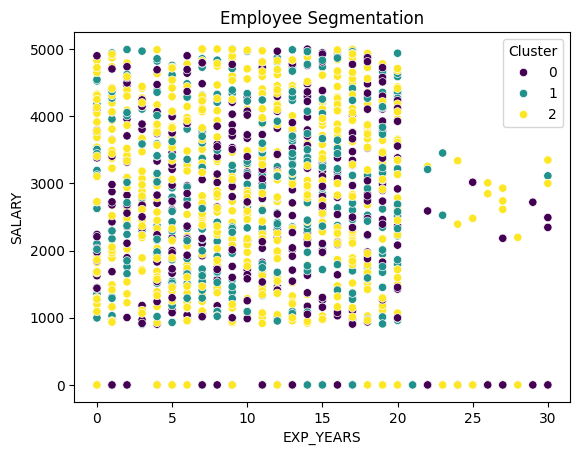

In [29]:
# Visualizing the clusters
sns.scatterplot(x='EXP_YEARS', y='SALARY', hue='Cluster', data=data, palette='viridis')
plt.title('Employee Segmentation')
plt.show()

# Step 4: Predictive Analytics - Salary Prediction
# Feature Engineering


In [31]:
data['STARTING_DATE'] = pd.to_datetime(data['STARTING_DATE'], errors='coerce')


In [32]:
print(data['STARTING_DATE'].isna().sum())


0


In [33]:
data['YEAR_2'] = data['STARTING_DATE'].dt.year + 2
